In [2]:
import os
cwd = os.getcwd()
os.chdir(os.path.join(cwd,'../../data/exactvsheur/multi_OF'))

In [3]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as matcoll
import glob
import json

In [15]:
def file_finder(deg,alph):
    deg = str(deg)+'-deg--'
    alph = str(alph)+'alpha'
    file = deg+alph

    rides = glob.glob('*.csv', recursive=True)
    rides  = [s for s in rides if file in s]
    return rides

In [138]:
def plot_algo(df,figsize = (15,10)):    
    y01   = df['exact-distances'].values
    y02   = df['exact-predecessors'].values
    y11   = df['heuristic-distances'].dropna().values
    y12   = df['heuristic-predecessors'].dropna().values
    x0    = range(len(y01))
    x1    = range(len(y11))
    idx   = np.argwhere(np.diff(np.sign(y11 - y12))).flatten()
    

    lines0 = []
    lines1 = []
#     for i,dx in enumerate(idx):
#         pair = ((dx,0),(dx,y12[i]))
#         lines.append(pair)
    max_heur = np.where(y11==y11[-1])[0][-1]                                           #number of iterations for heuristics
    lines0.append(((max_heur,0),(max_heur,max(y11))))
    lines1.append(((np.where(y01==min(y02))[0][0],0),(np.where(y01==min(y02))[0][0],min(y01))))
    lines1.append(((np.where(y12==min(y11))[0][0],0),(np.where(y12==min(y11))[0][0],min(y11))))
    linecoll0 = matcoll.LineCollection(lines0, colors ='k',lw=0.5,alpha=0.2)
    linecoll1 = matcoll.LineCollection(lines1, colors ='k',lw=0.5, linestyle = '-.',alpha=0.3)    
    fig, ax = plt.subplots(figsize=figsize)
    ax.add_collection(linecoll0)
    ax.add_collection(linecoll1)
    
    plt.plot(((max_heur,0),(max_heur,max(y11))))
    
    plt.scatter(x0, y01, s = 1, c = 'b', alpha = 0.4,marker = 'o' ,label = 'exact')
    plt.scatter(x1, y11, s = 1, c = 'g', alpha = 0.8,marker = 'o' ,label = 'heuristic')

    plt.plot(x0, y02, c ='r', lw=1.5,linestyle =':' ,label = 'minima exact')
    plt.plot(x1, y12, c ='r', lw=1.3,linestyle = '--' ,label = 'minima heuristic')

    lgnd = plt.legend(scatterpoints=1, fontsize=10)
    lgnd.legendHandles[2]._sizes = [30]
    lgnd.legendHandles[3]._sizes = [30]

    plt.ylabel('Total utility')
    plt.xlabel('Iterations')
    #plt.xticks(range(0,max(x0),10000))
    plt.ylim(min(y01)-2,max(y01)+2)
    plt.xlim(0,max(x0))
    plt.show()
    

# Two Degree ride

alpha = 0.1

In [132]:
df_2 = pd.read_csv(file_finder(2,0.1)[0], delimiter = ';', header=0, index_col=0)

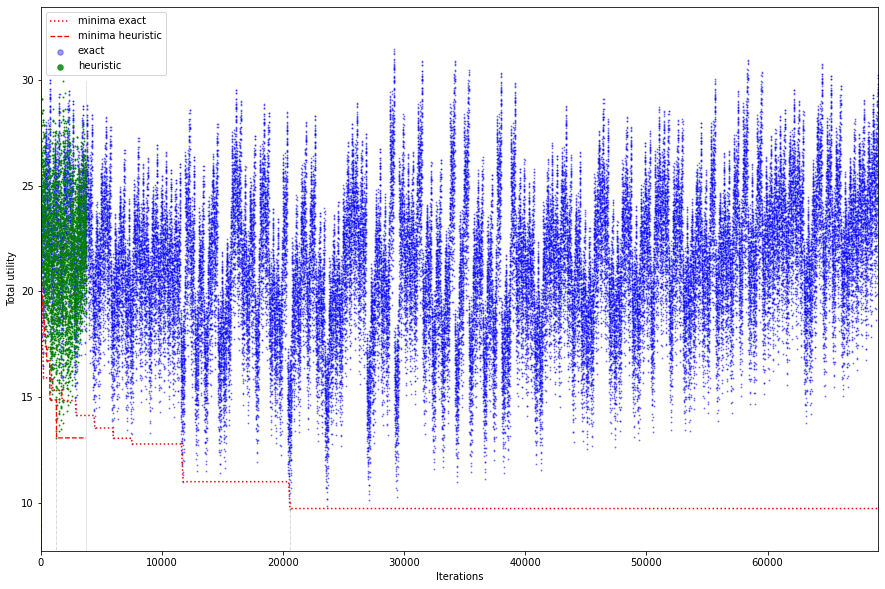

In [139]:
plot_algo(df_2)

alpha = 0.5

In [140]:
df_2 = pd.read_csv(file_finder(2,0.5)[0], delimiter = ';', header=0, index_col=0)

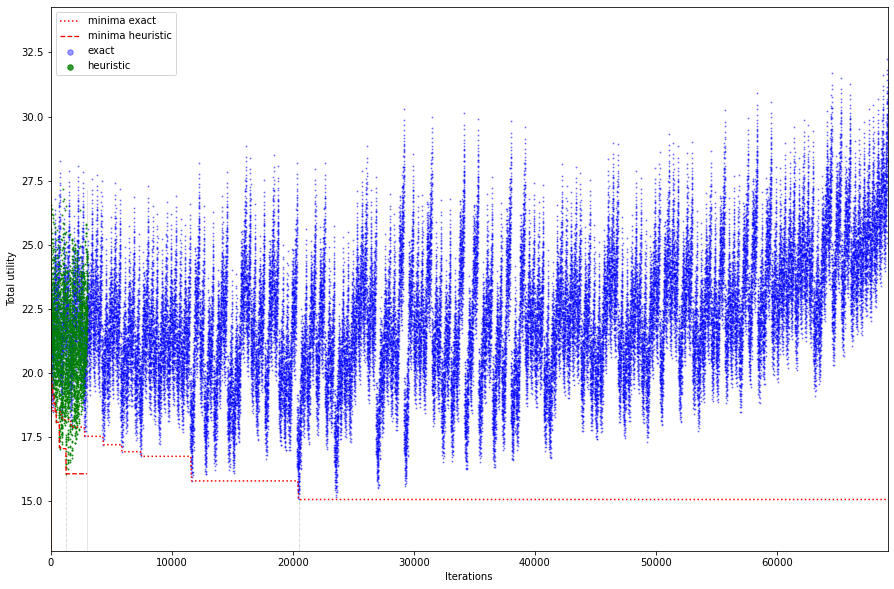

In [141]:
plot_algo(df_2)

alpha = 0.9

In [142]:
df_2 = pd.read_csv(file_finder(2,0.9)[0], delimiter = ';', header=0, index_col=0)

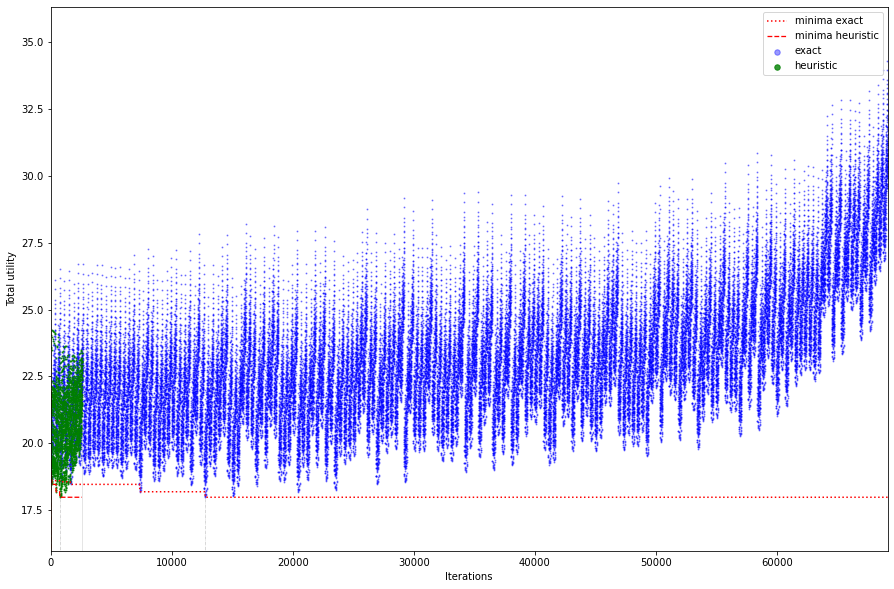

In [143]:
plot_algo(df_2)

# Three Degree Ride

In [39]:
df_3 = pd.read_csv(file_finder(3,0.5)[0], delimiter = ';', header=0, index_col=0)

In [40]:
df_3

,exact-distances,exact-predecessors,heuristic-distances,heuristic-predecessors
0,39.84220,0.00000,39.8422,0.0000
1,30.65360,39.84220,30.6536,39.8422
2,30.96325,30.65360,NaN,NaN
3,31.11070,30.65360,NaN,NaN
4,30.31070,30.65360,NaN,NaN
...,...,...,...,...
1435,33.62255,26.32445,NaN,NaN
1436,32.55145,26.32445,NaN,NaN
1437,33.74220,26.32445,NaN,NaN
1438,34.10660,26.32445,NaN,NaN


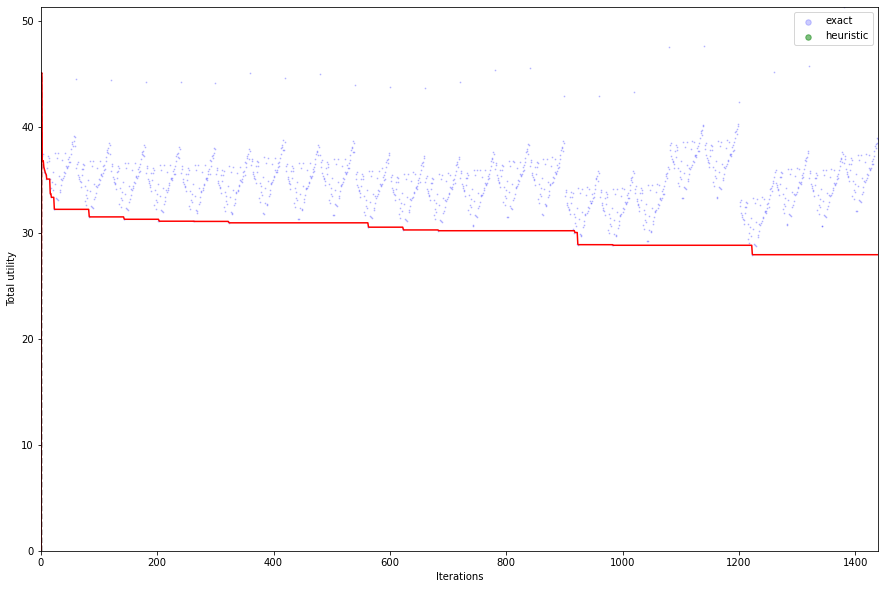

In [37]:
plot_algo(df_3)

# Four Degree Ride

In [13]:
df_4 = pd.read_csv(file_finder(4)[0], delimiter = ';', header=0, index_col=0)

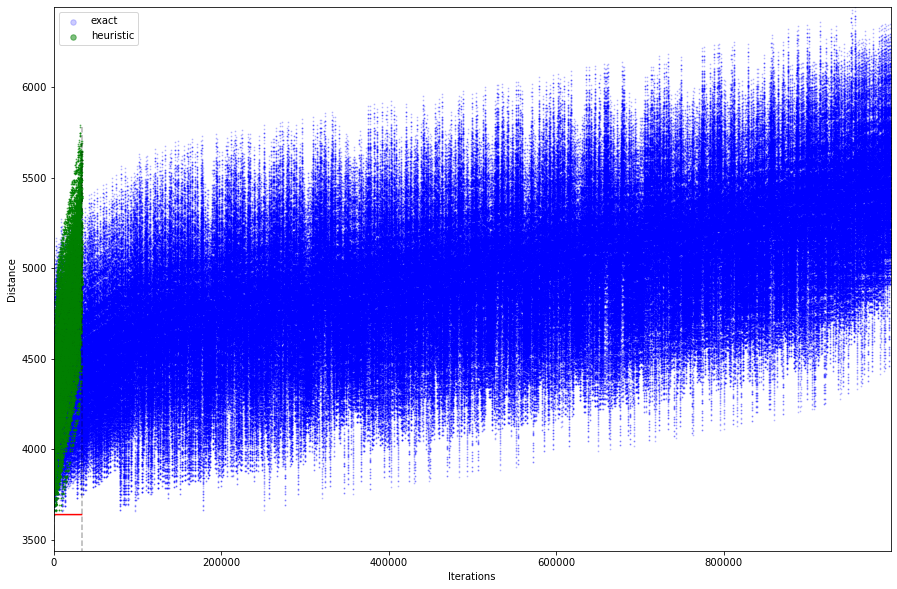

In [14]:
plot_algo(df_4)